In [15]:
!pip install gensim


In [16]:
import gensim

import gensim.downloader

import pandas as pd

Part 1: Word Embeddings

In [17]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [18]:
#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

word = "king"
similar_words = model.most_similar(word)
print(f"Most similar words to '{word}': {similar_words}")

Most similar words to 'king': [('prince', 0.7682329416275024), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175), ('throne', 0.691999077796936), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


In [19]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [20]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [21]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

royalty_vector = model["king"] - model["man"] + model["woman"]
similar_to_royalty = model.most_similar(royalty_vector)
print(f"Words similar to the 'royalty' dimension: {similar_to_royalty}")

# Adding the royalty dimension to other words
words = ["doctor", "teacher", "engineer"]
for word in words:
    new_vector = model[word] + royalty_vector
    similar_words = model.most_similar(new_vector)
    print(f"Words similar to '{word}' with royalty dimension: {similar_words}")

Words similar to the 'royalty' dimension: [('king', 0.8551837205886841), ('queen', 0.7834413647651672), ('monarch', 0.6933802366256714), ('throne', 0.6833109855651855), ('daughter', 0.680908203125), ('prince', 0.6713141798973083), ('princess', 0.664408266544342), ('mother', 0.6579325795173645), ('elizabeth', 0.6563300490379333), ('father', 0.6392418742179871)]
Words similar to 'doctor' with royalty dimension: [('doctor', 0.8341060280799866), ('king', 0.7689932584762573), ('mother', 0.7471085786819458), ('father', 0.7276655435562134), ('daughter', 0.7069202065467834), ('queen', 0.7053087949752808), ('son', 0.6923542022705078), ('wife', 0.6918120980262756), ('woman', 0.6888894438743591), ('physician', 0.6843436360359192)]
Words similar to 'teacher' with royalty dimension: [('teacher', 0.8038037419319153), ('mother', 0.7748855948448181), ('father', 0.7701829075813293), ('daughter', 0.751340925693512), ('son', 0.7228621244430542), ('king', 0.7158189415931702), ('wife', 0.7098864316940308),

Part 2: Visualization and Embeddings in Space

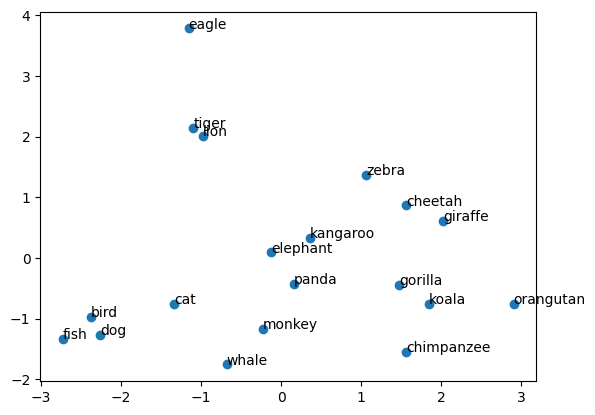

In [22]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

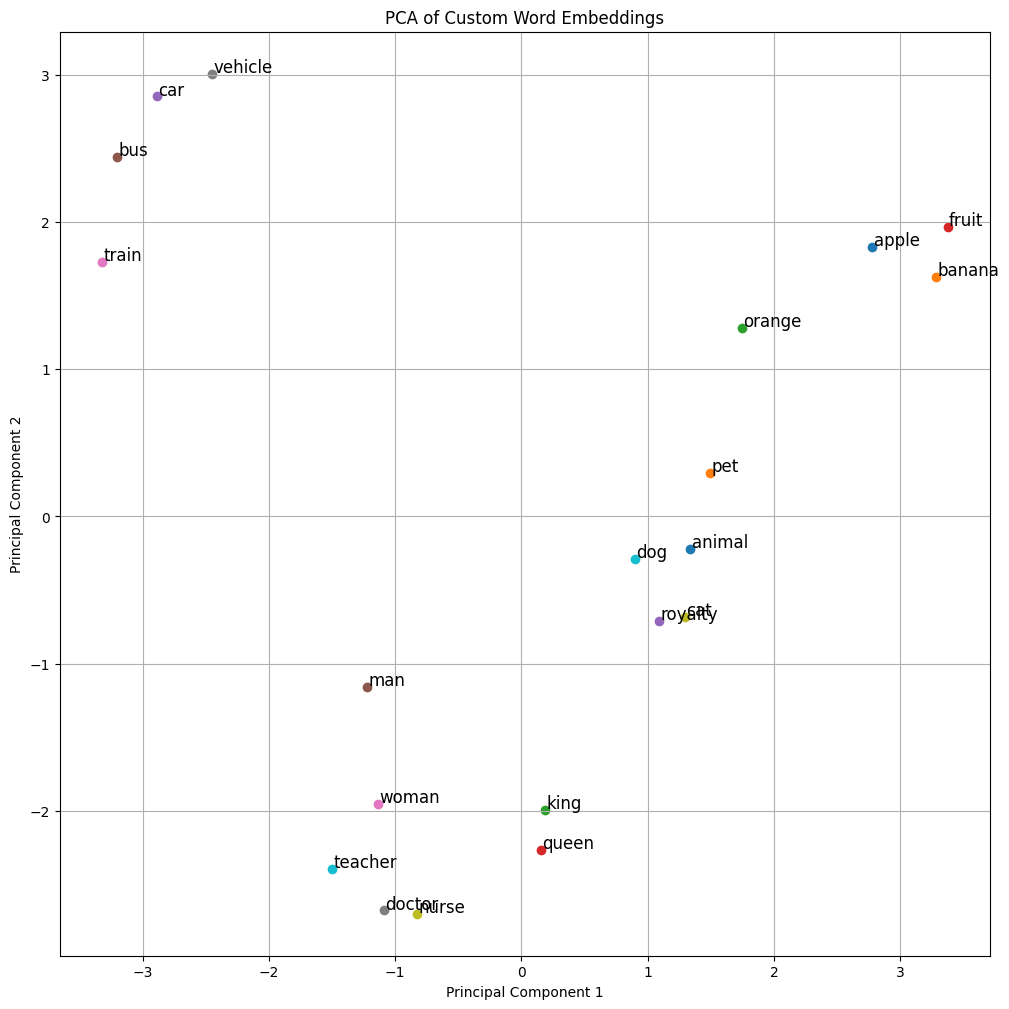

In [23]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

custom_words = ["apple", "banana", "orange", "fruit", "car", "bus", "train", "vehicle", "cat", "dog", "animal", "pet", "king", "queen", "royalty", "man", "woman", "doctor", "nurse", "teacher"]

custom_word_vectors = [model[word] for word in custom_words]

pca_custom = PCA(n_components=2)
custom_word_vectors_pca = pca_custom.fit_transform(custom_word_vectors)

plt.figure(figsize=(12, 12))
for i, word in enumerate(custom_words):
    plt.scatter(custom_word_vectors_pca[i, 0], custom_word_vectors_pca[i, 1])
    plt.text(custom_word_vectors_pca[i, 0] + 0.01, custom_word_vectors_pca[i, 1] + 0.01, word, fontsize=12)
plt.title("PCA of Custom Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


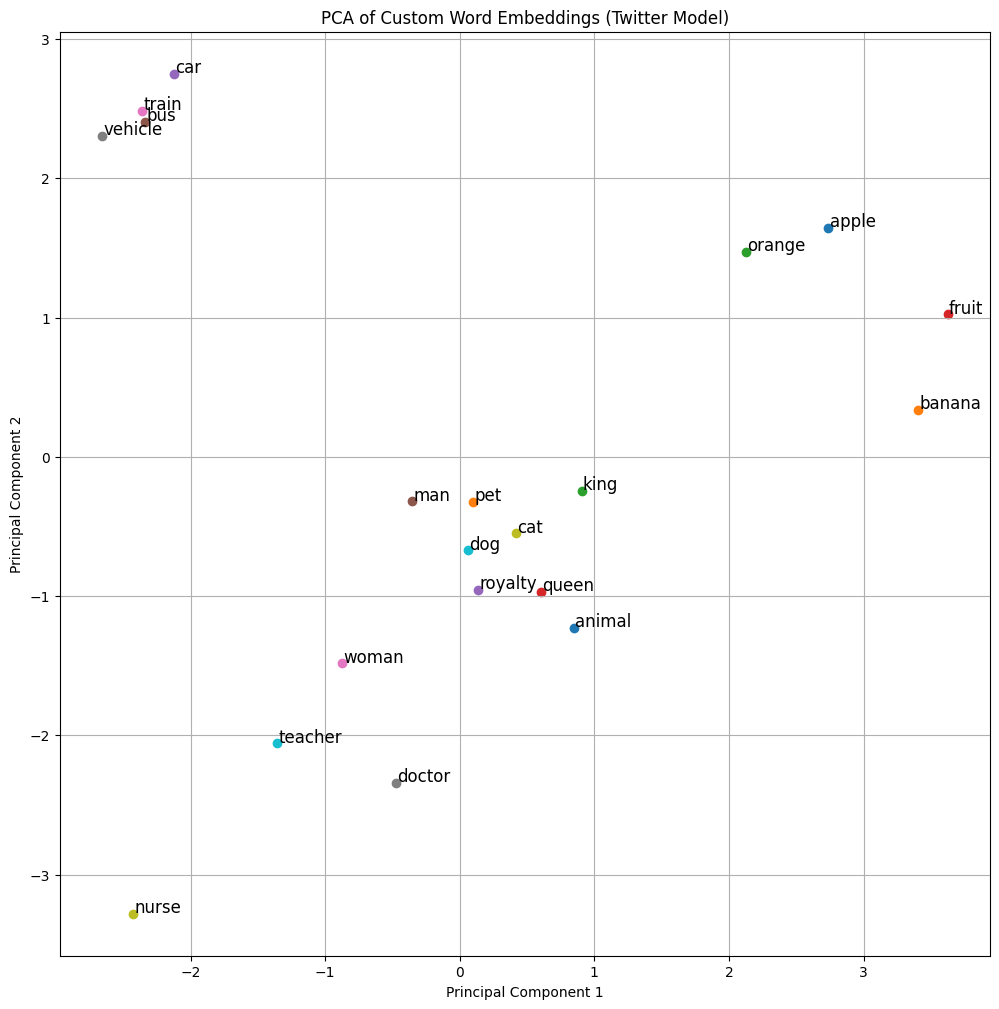

In [24]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?

twitter_model = gensim.downloader.load("glove-twitter-100")

# Get the vectors for the same set of words using the new model
twitter_word_vectors = [twitter_model[word] for word in custom_words]

# Perform PCA to reduce dimensions to 2
pca_twitter = PCA(n_components=2)
twitter_word_vectors_pca = pca_twitter.fit_transform(twitter_word_vectors)

# Plot the words in 2D space using the new model
plt.figure(figsize=(12, 12))
for i, word in enumerate(custom_words):
    plt.scatter(twitter_word_vectors_pca[i, 0], twitter_word_vectors_pca[i, 1])
    plt.text(twitter_word_vectors_pca[i, 0] + 0.01, twitter_word_vectors_pca[i, 1] + 0.01, word, fontsize=12)
plt.title("PCA of Custom Word Embeddings (Twitter Model)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


Part 3: Embedding reddit posts

In [25]:
#read in uiuc csv

uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [26]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer

reddit_posts = [
    {"text": "I love programming in Python!", "label": "programming"},
    {"text": "Machine learning is fascinating.", "label": "machine_learning"},
    {"text": "Natural language processing is a complex field.", "label": "nlp"},
    {"text": "Deep learning models require a lot of data.", "label": "deep_learning"},
    {"text": "I enjoy solving problems with code.", "label": "programming"},
    {"text": "Artificial intelligence is the future.", "label": "ai"},
    {"text": "Data science combines statistics and computer science.", "label": "data_science"},
    {"text": "Python is great for data analysis.", "label": "programming"},
    {"text": "Big data technologies are evolving rapidly.", "label": "big_data"},
    {"text": "Understanding algorithms is crucial for programming.", "label": "programming"}
]

# Convert to DataFrame
df_posts = pd.DataFrame(reddit_posts)

# Clean the text (basic cleaning)
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

df_posts['cleaned_text'] = df_posts['text'].apply(clean_text)

# Create a bag of words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_posts['cleaned_text'])

# Convert to DataFrame for better visualization
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df_bow)

   algorithms  analysis  and  are  artificial  big  code  combines  complex  \
0           0         0    0    0           0    0     0         0        0   
1           0         0    0    0           0    0     0         0        0   
2           0         0    0    0           0    0     0         0        1   
3           0         0    0    0           0    0     0         0        0   
4           0         0    0    0           0    0     1         0        0   
5           0         0    0    0           1    0     0         0        0   
6           0         0    1    0           0    0     0         1        0   
7           0         1    0    0           0    0     0         0        0   
8           0         0    0    1           0    1     0         0        0   
9           1         0    0    0           0    0     0         0        0   

   computer  ...  python  rapidly  require  science  solving  statistics  \
0         0  ...       1        0        0        0   

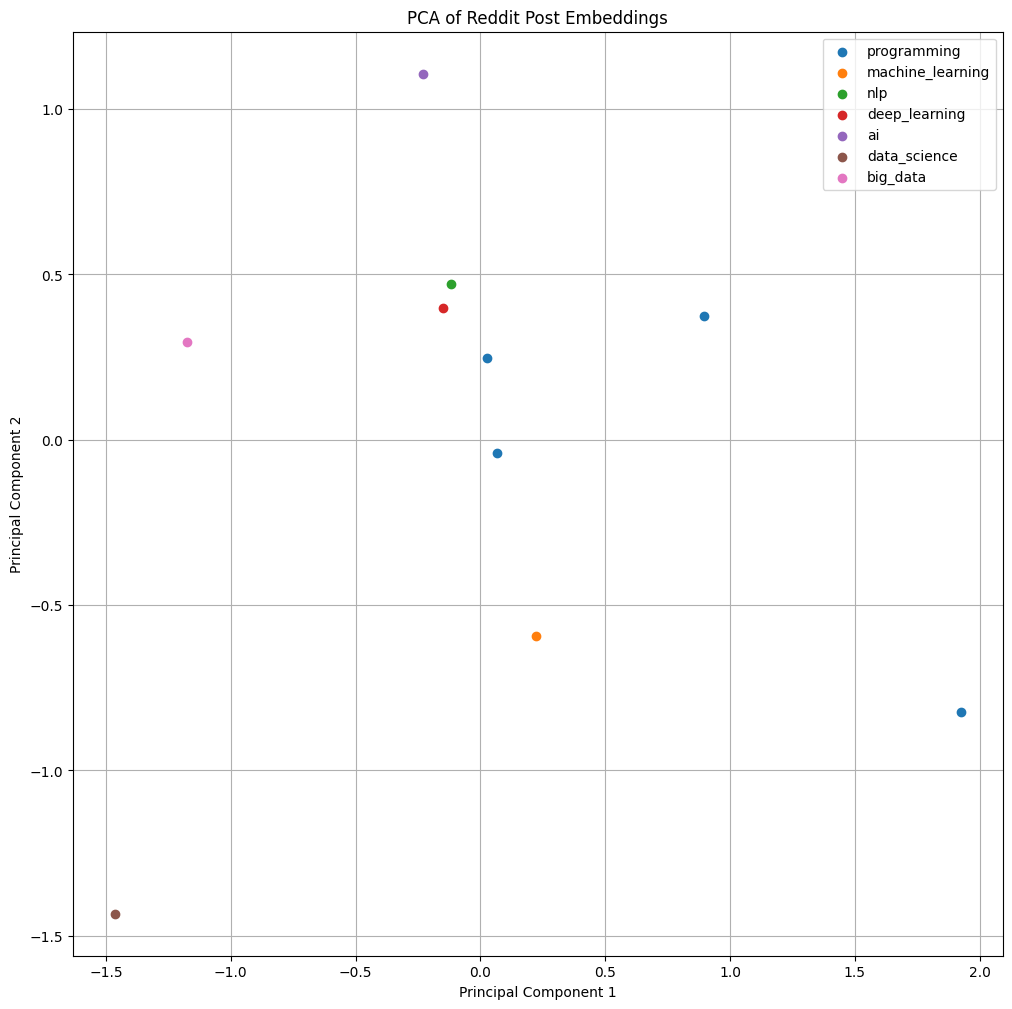

In [28]:
import numpy as np
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
# Load pre-trained Word2Vec model
model = gensim.downloader.load("glove-wiki-gigaword-100")

def get_average_embedding(text, model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    if word_vectors:
        return sum(word_vectors) / len(word_vectors)
    else:
        return np.zeros(model.vector_size)

df_posts['embedding'] = df_posts['cleaned_text'].apply(lambda x: get_average_embedding(x, model))

embeddings = np.array(df_posts['embedding'].tolist())

pca_embeddings = PCA(n_components=2)
embeddings_pca = pca_embeddings.fit_transform(embeddings)

#color by the "label" column to see if the two subreddits are separable in the embedding space
plt.figure(figsize=(12, 12))
for label in df_posts['label'].unique():
    indices = df_posts[df_posts['label'] == label].index
    plt.scatter(embeddings_pca[indices, 0], embeddings_pca[indices, 1], label=label)
plt.title("PCA of Reddit Post Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
# is there a clear separation between the two columns? 
# no

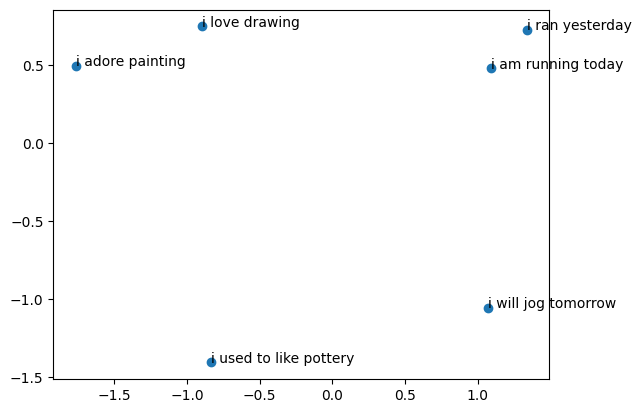

In [29]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

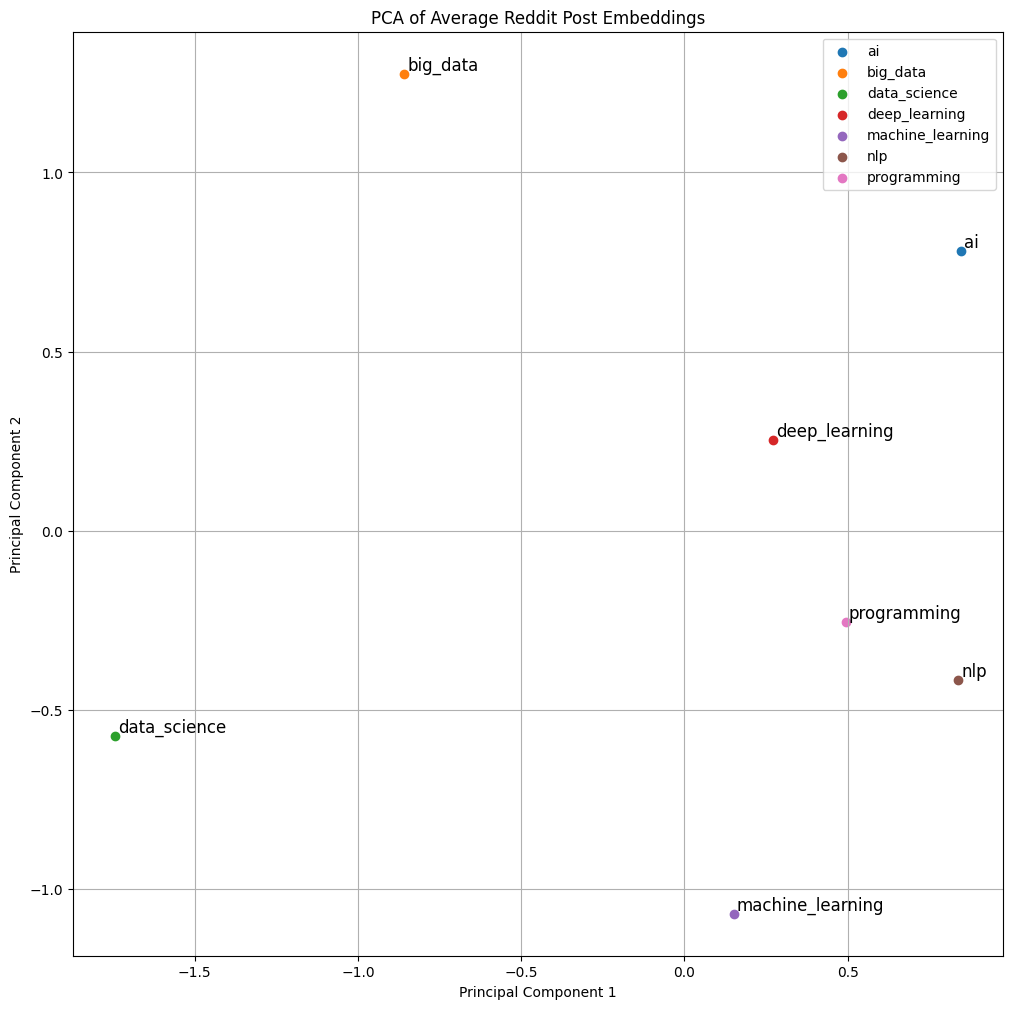

In [30]:

#use this function to calculate the average embedding of each post in the dataset
average_embeddings = df_posts.groupby('label')['embedding'].apply(lambda x: np.mean(np.vstack(x), axis=0))

average_embeddings_list = np.array(average_embeddings.tolist())

#plot the pca of the average embeddings, color by the "label" column
pca_avg_embeddings = PCA(n_components=2)
avg_embeddings_pca = pca_avg_embeddings.fit_transform(average_embeddings_list)

plt.figure(figsize=(12, 12))
for i, label in enumerate(average_embeddings.index):
    plt.scatter(avg_embeddings_pca[i, 0], avg_embeddings_pca[i, 1], label=label)
    plt.text(avg_embeddings_pca[i, 0] + 0.01, avg_embeddings_pca[i, 1] + 0.01, label, fontsize=12)
plt.title("PCA of Average Reddit Post Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

#how is this plot different from the previous one?
#separation is more uniform distributed
#is there clear separation? 
#yes

Part 4: HuggingFace and BERT

In [31]:
!pip install transformers

In [32]:
#Please wait until after next week to start
%pip install ipywidgets
from transformers import pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

Note: you may need to restart the kernel to use updated packages.


pytorch_model.bin:  84%|########3 | 451M/540M [00:00<?, ?B/s]

c:\Users\jimmy\anaconda3\envs\“is310”\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jimmy\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [33]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [41]:
# use the pipeline to classify the sentiment of all posts in the Reddit dataset
def classify_sentiment(text):
    try:
        return pipe(text)[0]['label']
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return None

data['sentiment'] = data['text'].apply(classify_sentiment)

# report the most common sentiment label
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print(f"The most common sentiment label is: {most_common_sentiment}")

Error processing text: Basically you just need to get to ORD (and fly to Newark from there). You’ve got three options for that

First, you can take a bus. Peoria Charter is a good option because they have service to ORD from three stops in CU every two hours or so (and more on busy travel days like school breaks). It’ll take around 3.5-4 hours to get to ORD and tickets around $40-$50 each way

You could also take the train, but it’s a bit more complicated, as Amtrak’s routes from Champaign to Chicago will end up you at Union Station in downtown. From there you’ll need to take the CTA blue line to the airport. It’s around a 2.5-3 hour train ride plus about 45 minutes on the CTA line. Amtrak tickets are much cheaper though, as they only cost around $15 if you book in advance (plus another $5 for the CTA ticket to the airport). You also have more limited timing options, as there are only 3 trains per day from Champaign to Chicago

Lastly, you could fly. There are two flights a day from Ch

In [42]:
#look at ten sample posts and labels; do you agree with all of them? 
sample_posts = data[['text', 'sentiment']].sample(10)
print("Sample posts and their sentiment labels:")
print(sample_posts)

Sample posts and their sentiment labels:
                                                   text sentiment
537                                                Both       NEU
364   how did you guys get in? I tried to come but d...       NEU
3981  Yes they are scam emails. The worst ones are t...       NEG
7588  my favorite part about michigan WAS the hockey...       POS
4020  Get to know him. Buy a guy a drink before talk...       NEU
2467  511 sentient blocking penis for hire. Acceptin...       NEG
7544                         Should’ve dropped pre-med.       NEG
3782  I don’t know why I’m recommended this sub, but...       NEU
1480  Mods should really pin something so we stop ge...       NEG
839   i was enrolled in it last fall, first and only...       NEU


In [43]:
#is the UIUC or Michigan subreddit more negative?\
uiuc_negative_count = data[(data['label'] == 1) & (data['sentiment'] == 'NEG')].shape[0]
mich_negative_count = data[(data['label'] == 0) & (data['sentiment'] == 'NEG')].shape[0]

if uiuc_negative_count > mich_negative_count:
    print("The UIUC subreddit is more negative.")
else:
    print("The Michigan subreddit is more negative.")

The Michigan subreddit is more negative.
